In [1]:
import sys
import os
sys.path.append(os.path.abspath('../../src/Bayesian_Data_Analysis-Andrew_Gelman'))
from import_data import DataImporter

In [ ]:
# Figure 1.1 
# import dataset 

<p>Figure 1.1 Scatterplot of actual outcome vs. point spread for each of 672 professional football games. The x and y coordinates are jittered by adding uniform random numbers to each point's coordinates (between −0.1 and 0.1 for the x coordinate; between −0.2 and 0.2 for the y coordinate) in order to display multiple values but preserve the discrete-valued nature of each.</p>


<p>Football experts provide a point spread for every football game as a measure of the difference in ability between the two teams. For example, team A might be a 3.5-point favorite to defeat team B. The implication of this point spread is that the proposition that team A, the favorite, defeats team B, the underdog, by 4 or more points is considered a fair bet; in other words, the probability that A wins by more than 3.5 points is 1 2 . If the point spread is an integer, then the implication is that team A is as likely to win by more points than the point spread as it is to win by fewer points than the point spread (or to lose); there is positive probability that A will win by exactly the point spread, in which case neither side is paid off. The assignment of point spreads is itself an interesting exercise in probabilistic reasoning; one interpretation is that the point spread is the median of the distribution of the gambling population's beliefs about the possible outcomes of the game. For the rest of this example, we treat point spreads as given and do not worry about how they were derived.</p>

<p>The point spread and actual game outcome for 672 professional football games played during the 1981, 1983, and 1984 seasons are graphed in Figure 1.1. (Much of the 1982 season was canceled due to a labor dispute.) Each point in the scatterplot displays the point spread, x, and the actual outcome (favorite's score minus underdog's score), y. (In games with a point spread of zero, the labels 'favorite' and 'underdog' were assigned at random.) A small random jitter is added to the x and y coordinate of each point on the graph so that multiple points do not fall exactly on top of each other.</p>

### Assigning probabilities based on observed frequencies

<p>It is of interest to assign probabilities to particular events: Pr(favorite wins), Pr(favorite wins | point spread is 3.5 points), Pr(favorite wins by more than the point spread), Pr(favorite wins by more than the point spread | point spread is 3.5 points), and so forth. We might report a subjective probability based on informal experience gathered by reading the newspaper and watching football games. The probability that the favored team wins a game should certainly be greater than 0.5, perhaps between 0.6 and 0.75? More complex events require more intuition or knowledge on our part. A more systematic approach is to assign probabilities based on the data in Figure 1.1. Counting a tied game as one-half win and</p>



<p>Figure 1.2 (a) Scatterplot of (actual outcome − point spread) vs. point spread for each of 672 professional football games (with uniform random jitter added to x and y coordinates). (b) Histogram of the differences between the game outcome and the point spread, with the N(0, 142) density superimposed.</p>
<p>one-half loss, and ignoring games for which the point spread is zero (and thus there is no favorite), we obtain empirical estimates such as:</p>
<ul>
<li>Pr(favorite wins) = 410.5 655 = 0.63</li>
<li>Pr(favorite wins | x = 3.5) = 36 59 = 0.61</li>
<li>Pr(favorite wins by more than the point spread) = 308 655 = 0.47</li>
<li>Pr(favorite wins by more than the point spread | x = 3.5) = 32 59 = 0.54.</li>
</ul>
<p>These empirical probability assignments all seem sensible in that they match the intuition of knowledgeable football fans. However, such probability assignments are problematic for events with few directly relevant data points. For example, 8.5-point favorites won five out of five times during this three-year period, whereas 9-point favorites won thirteen out of twenty times. However, we realistically expect the probability of winning to be greater for a 9-point favorite than for an 8.5-point favorite. The small sample size with point spread 8.5 leads to imprecise probability assignments. We consider an alternative method using a parametric model.</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="a-parametric-model-for-the-difference-between-outcome-and-point-spread">A parametric model for the difference between outcome and point spread<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#a-parametric-model-for-the-difference-between-outcome-and-point-spread" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Figure 1.2a displays the differences y−x between the observed game outcome and the point spread, plotted versus the point spread, for the games in the football dataset. (Once again, random jitter was added to both coordinates.) This plot suggests that it may be roughly reasonable to model the distribution of y − x as independent of x. (See Exercise 6.10.) Figure 1.2b is a histogram of the differences y − x for all the football games, with a fitted normal density superimposed. This plot suggests that it may be reasonable to approximate the marginal distribution of the random variable d = y − x by a normal distribution. The sample mean of the 672 values of d is 0.07, and the sample standard deviation is 13.86, suggesting that the results of football games are approximately normal with mean equal to the point spread and standard deviation nearly 14 points (two converted touchdowns). For the remainder of the discussion we take the distribution of d to be independent of x and normal with mean zero and standard deviation 14 for each x; that is,</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>d</mi><mi mathvariant="normal">∣</mi><mi>x</mi><mo>∼</mo><mi mathvariant="normal">N</mi><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>1</mn><msup><mn>4</mn><mn>2</mn></msup><mo stretchy="false">)</mo><mo separator="true">,</mo></mrow><annotation encoding="application/x-tex">d|x\sim\mathrm{N}(0,14^{2}),</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal">d</span><span class="mord">∣</span><span class="mord mathnormal">x</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∼</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mord mathrm">N</span><span class="mopen">(</span><span class="mord">0</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mord"><span class="mord">4</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span><span class="mclose">)</span><span class="mpunct">,</span></span></span></span></span></p>
<p>as displayed in Figure 1.2b. The assigned probability model is not perfect: it does not fit the data exactly, and, as is often the case with real data, neither football scores nor point spreads are continuous-valued quantities.</p>
<p>This electronic edition is for non-commercial purposes only.</p>
<p>16 1. PROBABILITY AND INFERENCE</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="assigning-probabilities-using-the-parametric-model">Assigning probabilities using the parametric model<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#assigning-probabilities-using-the-parametric-model" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Nevertheless, the model provides a convenient approximation that can be used to assign probabilities to events. If d has a normal distribution with mean zero and is independent of the point spread, then the probability that the favorite wins by more than the point spread is 1 2 , conditional on any value of the point spread, and therefore unconditionally as well. Denoting probabilities obtained by the normal model as Prnorm, the probability that an x-point favorite wins the game can be computed, assuming the normal model, as follows:</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mrow><mi mathvariant="normal">Pr</mi><mo>⁡</mo></mrow><mrow><mi mathvariant="normal">n</mi><mi mathvariant="normal">o</mi><mi mathvariant="normal">r</mi><mi mathvariant="normal">m</mi></mrow></msub><mo stretchy="false">(</mo><mi>y</mi><mo lspace="0em" rspace="0em">&gt;</mo><mn>0</mn><mtext> </mtext><mi mathvariant="normal">∣</mi><mtext> </mtext><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><msub><mrow><mi mathvariant="normal">Pr</mi><mo>⁡</mo></mrow><mrow><mi mathvariant="normal">n</mi><mi mathvariant="normal">o</mi><mi mathvariant="normal">r</mi><mi mathvariant="normal">m</mi></mrow></msub><mo stretchy="false">(</mo><mi>d</mi><mo lspace="0em" rspace="0em">&gt;</mo><mo>−</mo><mi>x</mi><mtext> </mtext><mi mathvariant="normal">∣</mi><mtext> </mtext><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><mn>1</mn><mo>−</mo><mi mathvariant="normal">Φ</mi><mrow><mo fence="true">(</mo><mo>−</mo><mfrac><mi>x</mi><mn>14</mn></mfrac><mo fence="true">)</mo></mrow><mo separator="true">,</mo></mrow><annotation encoding="application/x-tex">\operatorname*{Pr}_{\mathrm{norm}}(y{&gt;}0\,|\,x)=\operatorname*{Pr}_{\mathrm{norm}}(d{&gt;}-x\,|\,x)=1-\Phi\left(-{\frac{x}{14}}\right),</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop"><span class="mop"><span class="mord mathrm">Pr</span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathrm mtight">norm</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mord"><span class="mrel">&gt;</span></span><span class="mord">0</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">∣</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">x</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop"><span class="mop"><span class="mord mathrm">Pr</span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathrm mtight">norm</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mord"><span class="mrel">&gt;</span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal">x</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">∣</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">x</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">1</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.2em; vertical-align: -0.35em;"></span><span class="mord">Φ</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="minner"><span class="mopen delimcenter" style="top: 0em;"><span class="delimsizing size1">(</span></span><span class="mord">−</span><span class="mord"><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6954em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">14</span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">x</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span><span class="mclose delimcenter" style="top: 0em;"><span class="delimsizing size1">)</span></span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mpunct">,</span></span></span></span></span></p>
<p>where Φ is the standard normal cumulative distribution function. For example,</p>
<ul>
<li>Prnorm(favorite wins | x = 3.5) = 0.60</li>
<li>Prnorm(favorite wins | x = 8.5) = 0.73</li>
<li>Prnorm(favorite wins | x = 9.0) = 0.74.</li>
</ul>
<p>The probability for a 3.5-point favorite agrees with the empirical value given earlier, whereas the probabilities for 8.5- and 9-point favorites make more intuitive sense than the empirical values based on small samples.</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="1-7-example-calibration-for-record-linkage">1.7 Example: calibration for record linkage<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#1-7-example-calibration-for-record-linkage" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>We emphasize the essentially empirical (not 'subjective' or 'personal') nature of probabilities with another example in which they are estimated from data.</p>
<p>Record linkage refers to the use of an algorithmic technique to identify records from different databases that correspond to the same individual. Record-linkage techniques are used in a variety of settings. The work described here was formulated and first applied in the context of record linkage between the U.S. Census and a large-scale post-enumeration survey, which is the first step of an extensive matching operation conducted to evaluate census coverage for subgroups of the population. The goal of this first step is to declare as many records as possible 'matched' by computer without an excessive rate of error, thereby avoiding the cost of the resulting manual processing for all records not declared 'matched.'</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="existing-methods-for-assigning-scores-to-potential-matches">Existing methods for assigning scores to potential matches<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#existing-methods-for-assigning-scores-to-potential-matches" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Much attention has been paid in the record-linkage literature to the problem of assigning 'weights' to individual fields of information in a multivariate record and obtaining a composite 'score,' which we call y, that summarizes the closeness of agreement between two records. Here, we assume that this step is complete in the sense that these rules have been chosen. The next step is the assignment of candidate matched pairs, where each pair of records consists of the best potential match for each other from the respective databases. The specified weighting rules then order the candidate matched pairs. In the motivating problem at the Census Bureau, a binary choice is made between the alternatives 'declare matched' vs. 'send to followup,' where a cutoff score is needed above which records are declared matched. The false-match rate is then defined as the number of falsely matched pairs divided by the number of declared matched pairs.</p>
<p>Particularly relevant for any such decision problem is an accurate method for assessing the probability that a candidate matched pair is a correct match as a function of its score. Simple methods exist for converting the scores into probabilities, but these lead to extremely inaccurate, typically grossly optimistic, estimates of false-match rates. For example, a manual check of a set of records with nominal false-match probabilities ranging from 10−3 to 10−7 (that is, pairs deemed almost certain to be matches) found actual false-match rates</p>

In [3]:
data_importer = DataImporter('football')
df = data_importer.import_data()
print(df.head())

   home  favorite  underdog  spread favorite.name underdog.name  week
0     1        21        13     2.0            TB           MIN     1
1     1        27         0     9.5           ATL            NO     1
2     1        31         0     4.0           BUF           NYJ     1
3     1         9        16     4.0           CHI            GB     1
4     1        27        21     4.5           CIN           SEA     1


### Probabilistic Reformulation

Bayesians take a probabilistic view of the world and express this model in terms of probability distributions. Our above linear regression can be reformulated as:

$$ Y \sim \mathcal{N}(X\beta, \sigma^2) $$

In words, we view $ Y $ as a random variable (or random vector) of which each element (data point) is distributed according to a Normal distribution. The mean of this normal distribution is provided by our linear predictor with variance $ \sigma^2 $.

While this is essentially the same model, there are two critical advantages of Bayesian estimation:

- **Priors**: We can quantify any prior knowledge we might have by placing priors on the parameters. For example, if we think that $ \sigma $ is likely to be small we would choose a prior with more probability mass on low values.
- **Quantifying uncertainty**: We do not get a single estimate of $ \beta $ as above but instead a complete posterior distribution about how likely different values of $ \beta $ are. For example, with few data points our uncertainty in $ \beta $ will be very high and we’d be getting very wide posteriors.

### Bayesian GLMs in PyMC

To get started building GLMs in PyMC, let’s first import the required modules.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import pymc as pm

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.19.1


In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

### Generating data

Essentially we are creating a regression line defined by intercept and slope and add data points by sampling from a Normal with the mean set to the regression line.

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame({"x": x, "y": y})

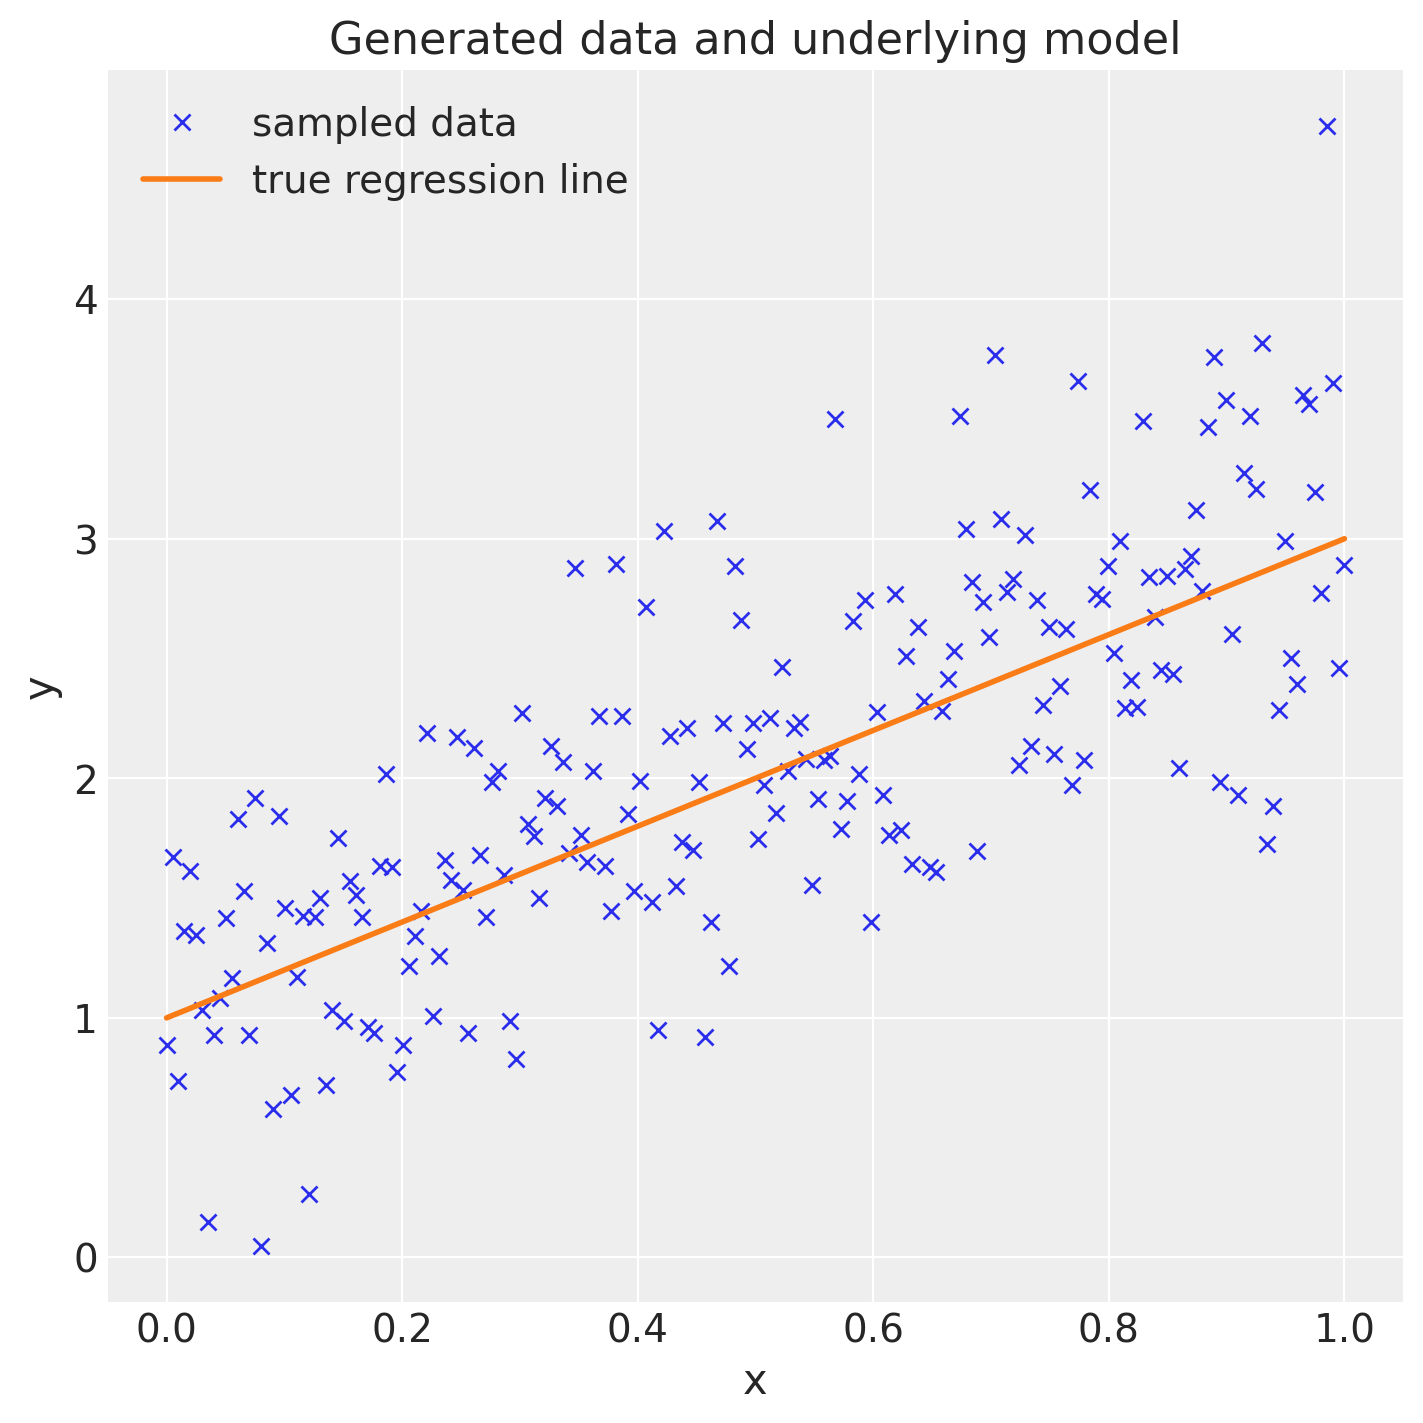

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

### Estimating the model

Let's fit a Bayesian linear regression model to this data. In PyMC, the model specifications take place in a `with` expression, called a context manager. By default, models are fit using the [NUTS sampler](http://arxiv.org/abs/1111.4246), resulting in a trace of samples representing the marginal posterior distribution of the latent model parameters.

In [5]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


/home/gabriel/Escritorio/Proyectos/Grupo_Posterior/Posterior.ia/pymc_experiments/.venv/lib/python3.12/site-packages
/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.


This should be fairly readable for people who know probabilistic programming. However, would a non-statistician know what all this does? Moreover, recall that this is an extremely simple model that would be one line in R. Having multiple, potentially transformed regressors, interaction terms or link-functions would also make this much more complex and error prone.

To make things even simpler, the <a class="reference external" href="https://bambinos.github.io/bambi/"><code class="docutils literal notranslate"><span class="pre">bambi</span></code></a> library takes a <a class="reference external" href="https://bambinos.github.io/formulae/">formula</a> linear model specifier from which it creates a design matrix. `bambi` then adds random variables for each of the coefficients and an appropriate likelihood to the model.

If `bambi` is not installed, you can install it with `pip install bambi`.


In [6]:
import bambi as bmb

In [7]:
model = bmb.Model("y ~ x", data)
idata = model.fit(draws=3000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, x]


/home/gabriel/Escritorio/Proyectos/Grupo_Posterior/Posterior.ia/pymc_experiments/.venv/lib/python3.12/site-packages
/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.


Much shorter, but this code does the exact same thing as the previous specification (you can change priors and everything else too if we wanted). `bambi` parses the `formulae` model string, adds random variables for each regressor (`Intercept` and slope `x` in this case), adds a likelihood (by default, a Normal is chosen), and all other variables (`sigma`). Finally, `bambi` then initializes the parameters to a good starting point by estimating a frequentist linear model using <a class="reference external" href="http://statsmodels.sourceforge.net/">statsmodels</a>.

If you are not familiar with R's syntax, `'y ~ x'` specifies that we have an output variable `y` that we want to estimate as a linear function of `x`.


### Analyzing the model

Bayesian inference does not give us only one line of best fit (as maximum likelihood does) but rather a whole posterior distribution of plausible parameters. Lets plot the posterior distribution of our parameters and the individual samples we drew.

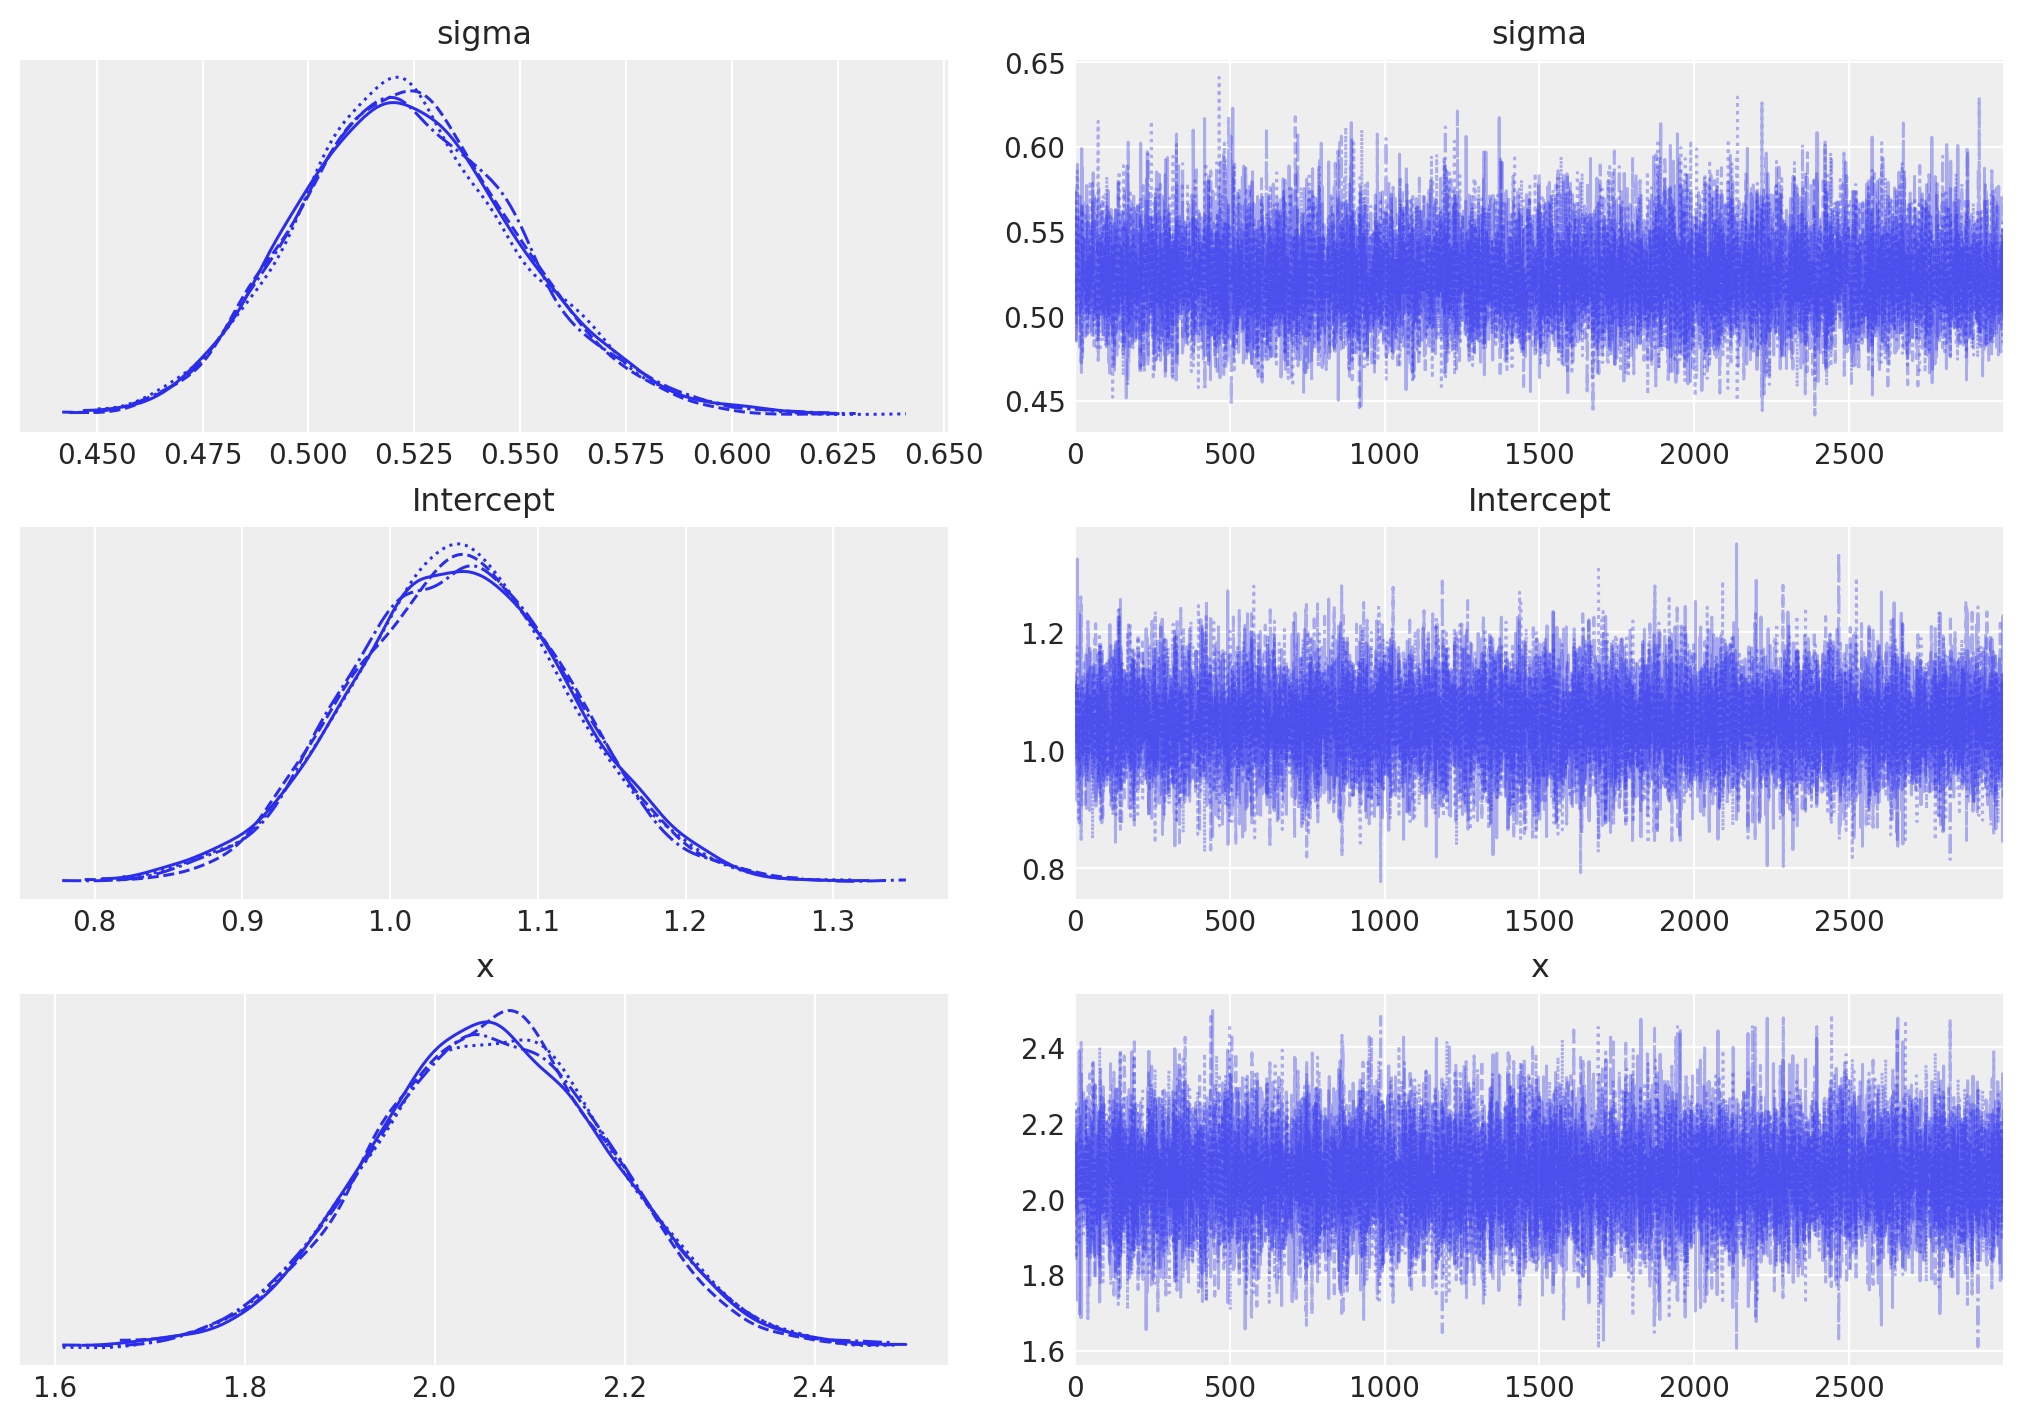

In [8]:
az.plot_trace(idata, figsize=(10, 7));

The left side shows our marginal posterior – for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

There are a couple of things to see here. The first is that our sampling chains for the individual parameters (left side) seem homogeneous and stationary (there are no large drifts or other odd patterns).

Secondly, the maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters used to generate the data (`x` is the regression coefficient and `sigma` is the standard deviation of our normal).

In GLMs, we thus do not only have one best fitting regression line, but many. A posterior predictive plot takes multiple samples from the posterior (intercepts and slopes) and plots a regression line for each of them. We can manually generate these regression lines using the posterior samples directly.

In [9]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

/home/gabriel/Escritorio/Proyectos/Grupo_Posterior/Posterior.ia/pymc_experiments/.venv/lib/python3.12/site-packages/arviz/plots/lmplot.py:212: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


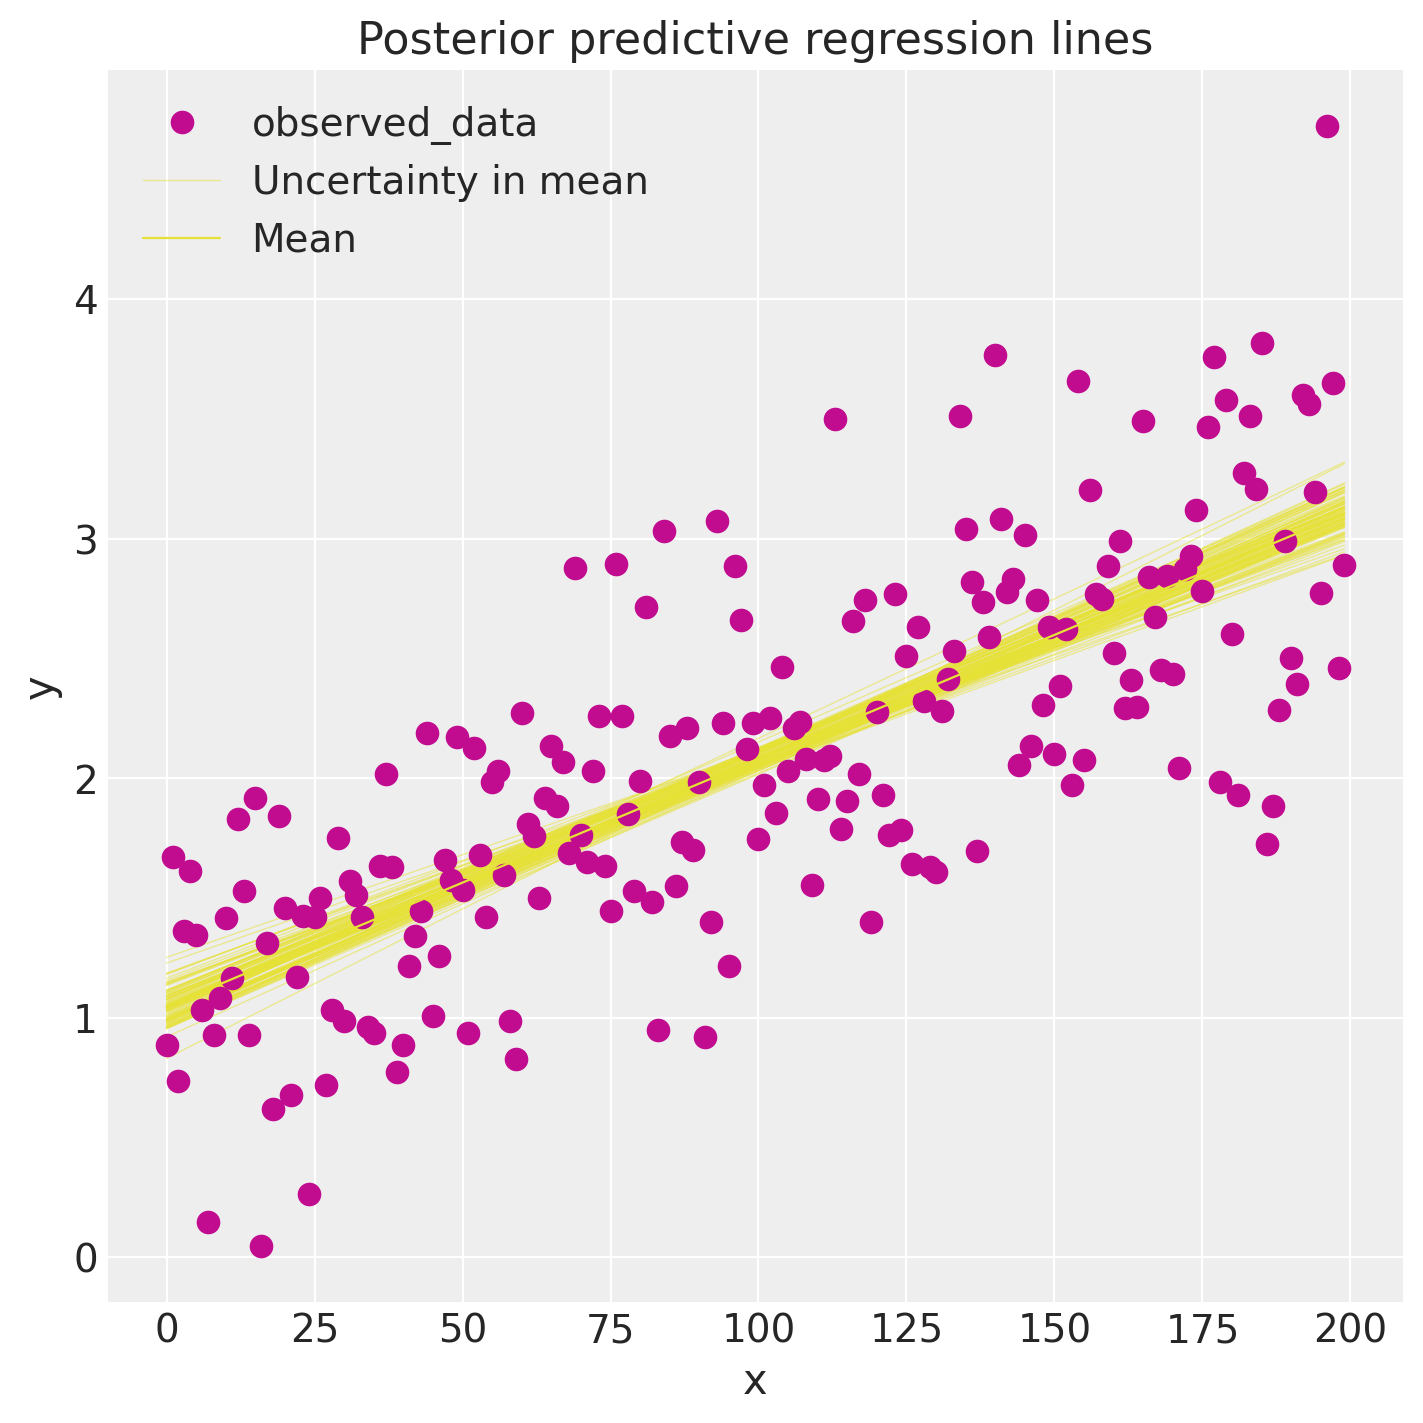

In [10]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

As you can see, our estimated regression lines are very similar to the true regression line. But since we only have limited data we have <em>uncertainty</em> in our estimates, here expressed by the variability of the lines.

## Summary

- Usability is currently a huge hurdle for wider adoption of Bayesian statistics.
- `Bambi` allows GLM specification with convenient syntax borrowed from R. Inference can then be carried out with `pymc`.
- Posterior predictive plots allow us to evaluate fit and our uncertainty in it.

### Further reading

For additional background, here are a few good resources on Bayesian statistics:

- The excellent book [Doing Bayesian Data Analysis by John Kruschke](https://sites.google.com/site/doingbayesiandataanalysis).
- [Andrew Gelman’s blog](http://andrewgelman.com/).

Author: Thomas Wiecki

In [11]:
%load_ext watermark

%watermark -n -u -v -iv -w -p pytensor

Last updated: Thu Dec 19 2024

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.30.0

pytensor: 2.26.4

pymc      : 5.19.1
pandas    : 2.2.3
matplotlib: 3.9.3
arviz     : 0.20.0
xarray    : 2024.11.0
bambi     : 0.14.0
numpy     : 1.26.0

Watermark: 2.5.0

